### Leanring of two unknown attractors given known sequence segments

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.util import optimize_tools, load_tools, process_tools
from src.lpvds.src.lpvds_class import lpvds_class

from scipy.stats import multivariate_normal

# %matplotlib tk


In [2]:
'''Load data'''
p_raw, q_raw, t_raw, dt = load_tools.load_npy()
'''Process data'''
p_in, q_in, t_in             = process_tools.pre_process(p_raw, q_raw, t_raw, opt= "savgol")
p_out, q_out                 = process_tools.compute_output(p_in, q_in, t_in)
p_init, q_init, p_att, q_att = process_tools.extract_state(p_in, q_in)
p_in, q_in, p_out, q_out     = process_tools.rollout_list(p_in, q_in, p_out, q_out)

In [3]:
x = p_in
x_dot = p_out
x_att = p_att
x_init = p_init

# N1 = 100
# sequence_arr = np.zeros((p_in.shape[0], ), dtype=int)
# sequence_arr[N1: ] = 1


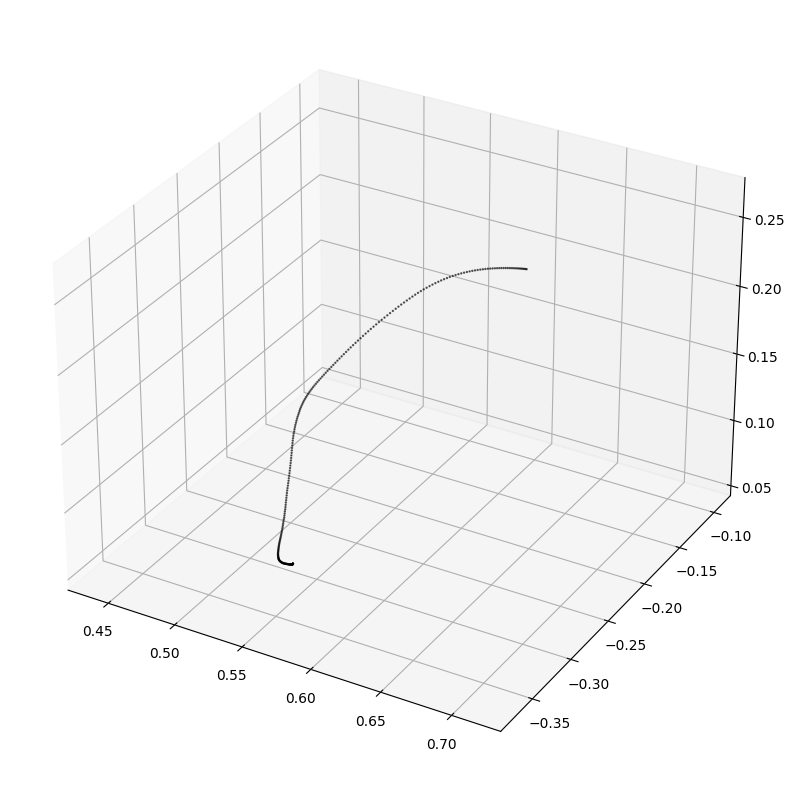

In [4]:
# x_1 = x[sequence_arr==0, :]
# x_dot_1 = x_dot[sequence_arr==0, :]


# x_2 = x[sequence_arr==1, :]
# x_dot_2 = x_dot[sequence_arr==1, :]



colors = ["r", "g", "b", "k", 'c', 'm', 'y', 'crimson', 'lime']
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], color='k', alpha= 0.6, s=0.5)
ax.axis('equal')
plt.show()

In [5]:
# x_1 = x[sequence_arr==0, :]
# x_dot_1 = x_dot[sequence_arr==0, :]

# x_2 = x[sequence_arr==1, :]
# x_dot_2 = x_dot[sequence_arr==1, :]


# x_att_1 = x_1[-1, :] - 0.01 * np.random.rand(3,).reshape(1, -1) # Random initialization
# # x_att_2 = x_att - 0.01 * np.random.rand(3,).reshape(1, -1) # Random initialization

# x_att_2 = x_att.reshape(1, -1) # Random initialization

In [6]:
# T = 10
# x_att_list = []
# for i in range(T):
#     P = optimize_tools._optimize_P(x-x_att, x_dot, np.zeros((x.shape[0], ), dtype=int))
#     A = optimize_tools.optimize_A(x, x_dot, x_att, gamma=np.ones((1, x.shape[0]), dtype=int), P=P)
#     x_att = optimize_tools.optimize_att(x, x_dot, A)

    # P_2 = optimize_tools._optimize_P(x_2-x_att_2, x_dot_2, np.zeros((x_2.shape[0], ), dtype=int))
    # A_2 = optimize_tools.optimize_A(x_2, x_dot_2, x_att_2, gamma=np.ones((1, x_2.shape[0]), dtype=int), P=P_2)
    # x_att_2 = optimize_tools.optimize_att(x_2, x_dot_2, A_2)

    # x_att_2 = optimize_tools.optimize_att(x_2, x_dot_2, A_2)

# P = optimize_tools._optimize_P(x-x_att, x_dot, np.zeros((x.shape[0], ), dtype=int))
# A = optimize_tools.optimize_A(x, x_dot, x_att, gamma=np.ones((1, x.shape[0]), dtype=int), P=P)


pos_ds_1 = lpvds_class(x, x_dot, x_att)
pos_ds_1.begin()


x_att = x_att.reshape(1, -1)

colors = ["r", "g", "b", "k", 'c', 'm', 'y', 'crimson', 'lime']
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], color='k', alpha= 0.6, s=0.5)
ax.scatter(x_att[:, 0], x_att[:, 1], x_att[:, 2], color='k', alpha= 0.6, s=0.5)
# ax.scatter(x_att_2[:, 0], x_att_2[:, 1], x_att_2[:, 2], color='k', alpha= 0.6, s=0.5)

ax.axis('equal')
plt.show()


x_test_list = []
for x_0 in x_init:
    x_test_list.append(pos_ds_1.sim(x[0, :].reshape(1, -1), dt=0.01))



# plot results
from src.lpvds.src.util import plot_tools
plot_tools.plot_ds_2d(x, x_test_list, pos_ds_1)
plt.show()


usage: Directionality-Aware Mixture Model [-h] [-b BASE] [-i INIT] [-t ITER]
                                          [-a ALPHA]
Directionality-Aware Mixture Model: error: unrecognized arguments: --f=/Users/sunansun/Library/Jupyter/runtime/kernel-v2-91596aMndl8YSGwXk.json


SystemExit: 2

/Users/sunansun/miniconda3/envs/venv3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
def _step(x, x_att, A, dt):
    K = A.shape[0]
    x_dot     = np.zeros((x.shape[1], 1))

    gamma = np.ones((K, x.shape[0]))
    for k in range(K):
        x_dot  += gamma[k, 0] * A[k] @ (x - x_att).T
    x_next = x + x_dot.T * dt

    return x_next, gamma, x_dot

In [ ]:
def sim(x_init, x_att, A, dt):
    tol = 10E-4
    max_iter = 10000

    x_test = [x_init]
    gamma_test = []
    v_test = []

    i = 0
    while np.linalg.norm(x_test[-1]-x_att) >= tol:
        if i > max_iter:
            print("Exceed max iteration")
            break

        x_next, gamma, v = _step(x_test[-1], x_att, A, dt)
        x_test.append(x_next)        
        gamma_test.append(gamma[:, 0])
        v_test.append(v)

        i += 1

    return np.vstack(x_test)

In [ ]:
# # evaluate results
x_test_list = []

for x_0 in x_init:
    x_test_list.append(sim(x_0.reshape(1, -1), x_att, A, dt=0.005))


# plot results
from src.lpvds.src.util import plot_tools
plot_tools.plot_ds_3d(x, x_test_list)
plt.show()

